In [ ]:
import pandas as pd 
import os
from src.datasets.uc_dataset import UCDataset
import torch
from itertools import combinations
from src.ed_models.data_utils import create_data_dict
import matplotlib.pyplot as plt

In [463]:
data_dict = create_data_dict(instance_path="../data/Train_Data/instance_2021_Q1_1/InputData.json")

In [464]:
scoring_results = pd.read_csv("scoring_results.csv")

In [465]:
scoring_results

,Unnamed: 0,hybrid_solution,real_solution,points,real_time,ED_time,final_time,bonus,penalty
0,instance_2021_Q1_2,10.28,10.27,99.0,62.02,40.10,40.20,0.0,0.0
1,instance_2021_Q1_5,10.52,10.50,99.0,30.02,216.90,217.00,0.0,0.0
2,instance_2021_Q2_4,13.39,13.34,97.0,13.71,234.72,234.82,0.0,0.0
3,instance_2021_Q2_6,15.05,15.03,99.0,5.64,173.87,173.97,0.0,0.0
4,instance_2021_Q2_8,17.04,16.94,95.0,13.85,230.24,230.34,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,instance_2029_Q2_69,7.96,7.90,93.0,14.28,27.29,27.39,0.0,0.0
96,instance_2029_Q3_18,14.22,14.20,99.0,18.16,204.95,205.05,0.0,0.0
97,instance_2029_Q4_11,1.08,1.06,81.0,8.41,5.78,5.88,0.0,0.0
98,instance_2029_Q4_29,1.53,1.53,98.0,8.54,12.53,12.63,0.0,0.0


In [466]:
all_startup_cost = [g.startup_costs[0] for g in data_dict["thermal_gen_data_list"]]

In [467]:
data_dict["thermal_gen_data_list"][0]

ThermalGeneratorData(name='gen_12c8d461', production_cost_curve=[(168.0, 66.45954011904762)], startup_costs=[1674.83578], startup_delays=[1.0], ramp_up_limit=1848.0, ramp_down_limit=1848.0, startup_limit=1848.0, shutdown_limit=1848.0, min_down_time=1.0, min_up_time=1.0, initial_power=0.0, initial_status=-1.0, min_power=130.0, max_power=298.0)

(array([32.,  8.,  6.,  1.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([    0.    ,  4601.4786,  9202.9572, 13804.4358, 18405.9144,
        23007.393 , 27608.8716, 32210.3502, 36811.8288, 41413.3074,
        46014.786 ]),
 <BarContainer object of 10 artists>)

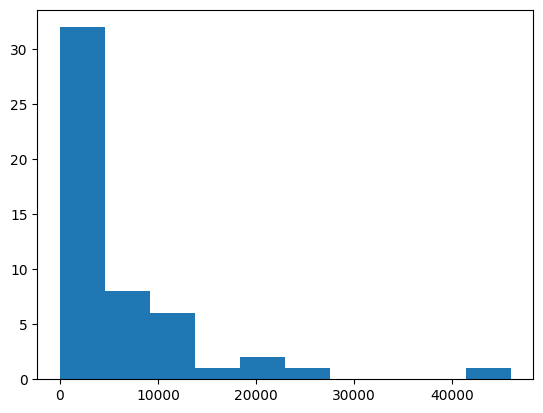

In [468]:
plt.hist(all_startup_cost)

In [469]:
# Less than 10 points
instances_with_less_10 = scoring_results[scoring_results["points"] < 10]
instances_with_less_10

,Unnamed: 0,hybrid_solution,real_solution,points,real_time,ED_time,final_time,bonus,penalty
5,instance_2024_Q1_4,22.47,20.21,0.0,9.95,32.27,32.37,0.0,0.0
12,instance_2028_Q1_3,30.00,13.35,0.0,13.25,99.87,99.97,0.0,0.0
65,instance_2025_Q4_48,24.39,19.15,0.0,15.83,90.80,90.90,0.0,0.0
66,instance_2025_Q4_72,20.91,9.93,0.0,654.40,47.45,47.55,0.0,0.0
90,instance_2028_Q4_72,23.95,18.26,0.0,16.09,69.09,69.19,0.0,0.0


In [470]:
data_dir = "../data/Train_Data"
os.listdir(data_dir)

['instance_2028_Q2_39',
 'instance_2027_Q3_69',
 'instance_2024_Q2_2',
 'instance_2021_Q2_68',
 'instance_2026_Q1_39',
 'instance_2029_Q4_59',
 'instance_2026_Q2_21',
 'instance_2024_Q1_62',
 'instance_2023_Q2_33',
 'instance_2025_Q3_32',
 'instance_2021_Q1_70',
 'instance_2025_Q4_25',
 'instance_2022_Q4_53',
 'instance_2029_Q4_66',
 'instance_2022_Q3_44',
 'instance_2029_Q3_71',
 'instance_2024_Q2_45',
 'instance_2023_Q1_14',
 'instance_2028_Q1_21',
 'instance_2027_Q4_41',
 'instance_2021_Q2_57',
 'instance_2027_Q3_56',
 'instance_2029_Q3_49',
 'instance_2028_Q1_19',
 'instance_2024_Q2_5',
 'instance_2026_Q2_19',
 'instance_2021_Q1_48',
 'instance_2021_Q2_50',
 'instance_2027_Q3_51',
 'instance_2023_Q1_13',
 'instance_2028_Q1_26',
 'instance_2027_Q4_46',
 'instance_2022_Q3_43',
 'instance_2024_Q2_42',
 'instance_2022_Q4_54',
 'instance_2029_Q4_61',
 'instance_2025_Q4_22',
 'instance_2023_Q2_34',
 'instance_2025_Q3_35',
 'instance_2024_Q1_65',
 'instance_2026_Q2_26',
 'instance_2021_Q2

In [471]:
# Look at instances that had less than 10 points
data_dir = "../data/Train_Data"
instances_dir_list = set(os.listdir(data_dir)) & set(instances_with_less_10.iloc[:, 0].to_list())
full_instances_dir_list = [os.path.join(data_dir, instance, "explanatory_variables.xlsx") for instance in instances_dir_list]
full_instances_dir_list

['../data/Train_Data/instance_2028_Q1_3/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2025_Q4_72/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2025_Q4_48/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2028_Q4_72/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2024_Q1_4/explanatory_variables.xlsx']

In [472]:
dataset = UCDataset(data_dir=data_dir)

In [473]:
dataset.features_files

['../data/Train_Data/instance_2021_Q1_1/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_10/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_11/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_12/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_13/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_14/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_15/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_16/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_17/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_18/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_19/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_2/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_20/explanatory_variables.xlsx',
 '../data/Train_Data/instance_2021_Q1_21/explanatory_variables.xlsx',
 '../data/Train_Data/i

In [474]:
index_map = {instance: i for i, instance in enumerate(dataset.features_files)}
indices = [index_map[t] for t in full_instances_dir_list if t in index_map]

In [475]:
idx = index_map["../data/Train_Data/instance_2021_Q1_2/explanatory_variables.xlsx"]
idx

11

In [476]:
pairs = list(combinations(indices, 2))
gen_names = dataset[0]["gen_names"]

In [477]:
gens_off = ['gen_9b33322b',
 'gen_f8b856d4',
 'gen_7402b65f',
 'gen_12c8d461',
 'gen_5f4016ca',
 'gen_4e0ff615',
 'gen_a42b5872',
 'gen_b42fba47',
 'gen_e2a0735e',
 'gen_d84b2d57',
 'gen_b4eba0b8',
 'gen_a06f1505',
 'gen_a7876643',
 'gen_7aeb2c57',
 'gen_bc3de19e',
 'gen_809ce5b4',
 'gen_d5aea532',
 'gen_ff58fdf4',
 'gen_f3e5828f',
 'gen_bec834ae',
 'gen_16b60ab4',
 'gen_3223a28b',
 'gen_3f6e6ecf',
 'gen_ea4d2032',
 'gen_528be175',
 'gen_82daac85']

In [478]:
startup_costs_gens_off = [g.startup_costs[0] for g in data_dict["thermal_gen_data_list"] if g.name in gens_off]
prod_cost_gens_off = [g.production_cost_curve for g in data_dict["thermal_gen_data_list"] if g.name in gens_off]

In [479]:
prod_cost_gens_off

[[(168.0, 66.45954011904762)],
 [(2.0, 122.74127499999986),
  (26.0, 122.74127538461539),
  (8.0, 124.00773749999996)],
 [(45.0, 150.20950088888887), (5.0, 150.20950200000007)],
 [(2.0, 122.74127499999986),
  (26.0, 122.74127538461539),
  (8.0, 124.00773749999996)],
 [(25.0, 72.29927920000002), (50.0, 89.70342419999999)],
 [(65.15, 88.65233998465078),
  (80.0, 99.50169774999999),
  (60.0, 101.73911400000003)],
 [(25.0, 72.29927920000002), (50.0, 89.70342419999999)],
 [(220.0, 66.45954013636363)],
 [(7.0, 137.78328000000002), (40.0, 137.78328000000002)],
 [(7.0, 134.47378), (40.0, 134.47377975)],
 [(41.0, 94.62581902439022),
  (55.0, 97.0109892727273),
  (85.0, 97.53868164705881),
  (5.0, 144.54553000000016)],
 [(95.0, 62.72365863157894)],
 [(7.0, 134.47378), (40.0, 134.47377975)],
 [(57.72, 145.8060174982675)],
 [(18.6, 150.2095010752688), (5.399999999999999, 150.20950185185185)],
 [(25.0, 72.29927920000002), (50.0, 89.70342419999999)],
 [(18.6, 150.2095010752688), (5.399999999999999, 

In [480]:
gen_names[49]

'gen_fde258d2'

In [481]:
j = 0
startup_costs_all = [g.startup_costs[0] for g in data_dict["thermal_gen_data_list"]]
for i in indices:
    print(f"Instance: {i}")
    instance_i = dataset[i]
    instance_j = dataset[11]

    load_i = instance_i["features"]["profiles"][:, 0]
    wind_i = instance_i["features"]["profiles"][:, 1]
    solar_i = instance_i["features"]["profiles"][:, 2]

    initial_power_i = instance_i["features"]["initial_conditions"][0]
    initial_status_i = instance_i["features"]["initial_conditions"][-1]

    load_j = instance_j["features"]["profiles"][:, 0]
    wind_j = instance_j["features"]["profiles"][:, 1]
    solar_j = instance_j["features"]["profiles"][:, 2]

    initial_power_j = instance_j["features"]["initial_conditions"][0]
    initial_status_j = instance_j["features"]["initial_conditions"][-1]

    diff_load = (load_i - load_j).abs().max()
    diff_wind = (wind_i - wind_j).abs().max()
    diff_solar = (solar_i - solar_j).abs().max()
    diff_initial_power = (initial_power_i - initial_power_j).abs().max()
    gen_idx = torch.nonzero(initial_status_i != initial_status_j)
    gen_names_weird = [gen_names[i] for i in gen_idx]
    gen_names_weird_off = set(gen_names_weird) & set(gens_off)
    startup_costs = [g.startup_costs[0] for g in data_dict["thermal_gen_data_list"] if g.name in gen_names_weird]


    print(f"Max load diff between {i} and {j}: {diff_load}")
    print(f"Max wind diff between {i} and {j}: {diff_wind}")
    print(f"Max solar diff between {i} and {j}: {diff_solar}")
    print(f"Max initial power diff between {i} and {j}: {diff_initial_power}")

    print(f"generators with different initial status: {gen_idx}")
    print(f"for instance i: {initial_status_i[gen_idx]}")
    print(f"for instance j:{initial_status_j[gen_idx]}")
    print(f"weird gens that were off: {gen_names_weird_off}")
    print(f"startup costs of weird gens: {startup_costs}")

    if len(gen_idx) != 0:
        for idx in gen_idx:
            if initial_status_i[idx] < 0:
                if instance_i["target"]["is_on"][:, idx].sum() > 0:
                    print(f"gen {idx} with startup cost {startup_costs_all[idx]} turned on after being initally off")



Instance: 2060
Max load diff between 2060 and 0: 2556.0
Max wind diff between 2060 and 0: 6157.62939453125
Max solar diff between 2060 and 0: 98.10331726074219
Max initial power diff between 2060 and 0: 464.0
generators with different initial status: tensor([[ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [11],
        [18],
        [21],
        [24],
        [25],
        [31],
        [35],
        [39],
        [45],
        [49]])
for instance i: tensor([[-5.],
        [-4.],
        [-1.],
        [-4.],
        [-5.],
        [-1.],
        [-4.],
        [-1.],
        [-4.],
        [-4.],
        [-4.],
        [-1.],
        [-4.],
        [-4.],
        [-4.]])
for instance j:tensor([[6.],
        [4.],
        [4.],
        [4.],
        [6.],
        [1.],
        [4.],
        [4.],
        [1.],
        [4.],
        [4.],
        [1.],
        [4.],
        [4.],
        [4.]])
weird gens that were off: set()
startup costs of weird gens: [22998.04

In [482]:
dataset[0]["gen_names"][49]

'gen_fde258d2'

In [483]:
off_gens = ['gen_9b33322b',
 'gen_f8b856d4',
 'gen_7402b65f',
 'gen_12c8d461',
 'gen_5f4016ca',
 'gen_4e0ff615',
 'gen_a42b5872',
 'gen_b42fba47',
 'gen_e2a0735e',
 'gen_d84b2d57',
 'gen_b4eba0b8',
 'gen_a06f1505',
 'gen_a7876643',
 'gen_7aeb2c57',
 'gen_bc3de19e',
 'gen_809ce5b4',
 'gen_d5aea532',
 'gen_ff58fdf4',
 'gen_f3e5828f',
 'gen_bec834ae',
 'gen_16b60ab4',
 'gen_3223a28b',
 'gen_3f6e6ecf',
 'gen_ea4d2032',
 'gen_528be175',
 'gen_82daac85']

In [484]:
dataset[2060]["features"]["profiles"]

tensor([[5.1240e+03, 6.1304e+03, 0.0000e+00],
        [4.8380e+03, 5.7060e+03, 0.0000e+00],
        [4.6760e+03, 5.4558e+03, 0.0000e+00],
        [4.5700e+03, 5.1082e+03, 0.0000e+00],
        [4.5250e+03, 4.5362e+03, 0.0000e+00],
        [4.6600e+03, 4.0865e+03, 0.0000e+00],
        [5.2450e+03, 3.7720e+03, 0.0000e+00],
        [6.2680e+03, 3.5863e+03, 0.0000e+00],
        [6.6060e+03, 3.2059e+03, 2.4476e-01],
        [6.7930e+03, 2.6622e+03, 1.1754e+01],
        [6.8140e+03, 1.7911e+03, 7.4133e+01],
        [6.7530e+03, 1.2390e+03, 1.5066e+02],
        [6.7340e+03, 1.1504e+03, 2.1395e+02],
        [6.6070e+03, 8.7478e+02, 2.4732e+02],
        [6.5670e+03, 6.1504e+02, 2.4371e+02],
        [6.6170e+03, 4.8759e+02, 2.0477e+02],
        [6.8180e+03, 3.2660e+02, 1.3577e+02],
        [7.3500e+03, 2.8800e+02, 4.9044e+01],
        [7.4440e+03, 3.2808e+02, 9.4995e-01],
        [7.0670e+03, 2.6550e+02, 0.0000e+00],
        [6.6710e+03, 2.5943e+02, 0.0000e+00],
        [6.2470e+03, 2.5128e+02, 0

In [485]:
dataset[2060]["features"]["initial_conditions"][1]

tensor([ -1.,  -2.,  -4.,  -5.,  -4.,  -1.,  -4.,  -5.,  -1.,  -4.,  -4.,  -1.,
         -2.,  -1.,  -4.,  -1.,  -1.,  -4.,  -4.,  -1.,  -1.,  -1.,  -1.,  -5.,
         -4.,  -4.,  -1.,  -1.,  -4.,  -1.,  -1.,  -4.,  -1.,  -1.,  -1.,  -1.,
         -1.,  -1., -10.,  -4.,  -1.,  -1.,  -1.,  -4.,  -4.,  -4.,  -1.,  -1.,
         -1.,  -4.,  -1.])

In [486]:
dataset[1450]["features"]["initial_conditions"][1]

tensor([ -1.,  -2.,  -4.,   6.,  -4.,   4.,  -4.,   6.,  -1.,  -4.,  -4.,   1.,
         -2.,  -1.,  -4.,  -1.,  -1.,  -4.,  -4.,  -1.,  -1.,   4.,  -1.,  -5.,
         -4.,  -4.,  -1.,  -1.,  -4.,  -1.,  -1.,   4.,  -1.,  -1.,  -1.,   1.,
         -1.,  -1., -10.,  -4.,  -1.,  -1.,  -1.,  -4.,  -4.,  -4.,  -1.,  -1.,
         -1.,  -4.,  -1.])

In [487]:
idx = torch.nonzero(dataset[2060]["features"]["initial_conditions"][1] != dataset[1450]["features"]["initial_conditions"][1])

In [488]:
dataset[2060]["features"]["initial_conditions"][1][idx]

tensor([[-5.],
        [-1.],
        [-5.],
        [-1.],
        [-1.],
        [-4.],
        [-1.]])

In [489]:
dataset[1450]["features"]["initial_conditions"][1][idx]

tensor([[6.],
        [4.],
        [6.],
        [1.],
        [4.],
        [4.],
        [1.]])